
Exploratory Data Analysis (EDA)

1. Dataset Overview:
- Number of Rows: 299
- Number of Columns: 13

First 5 Rows:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           1

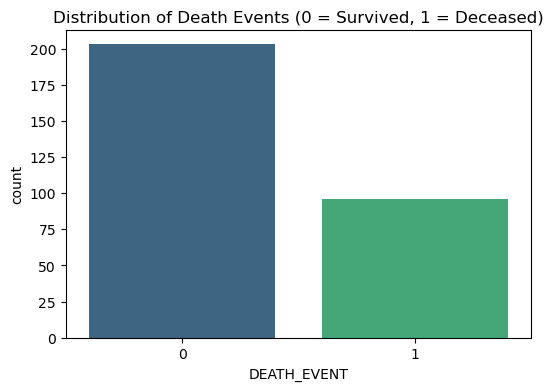

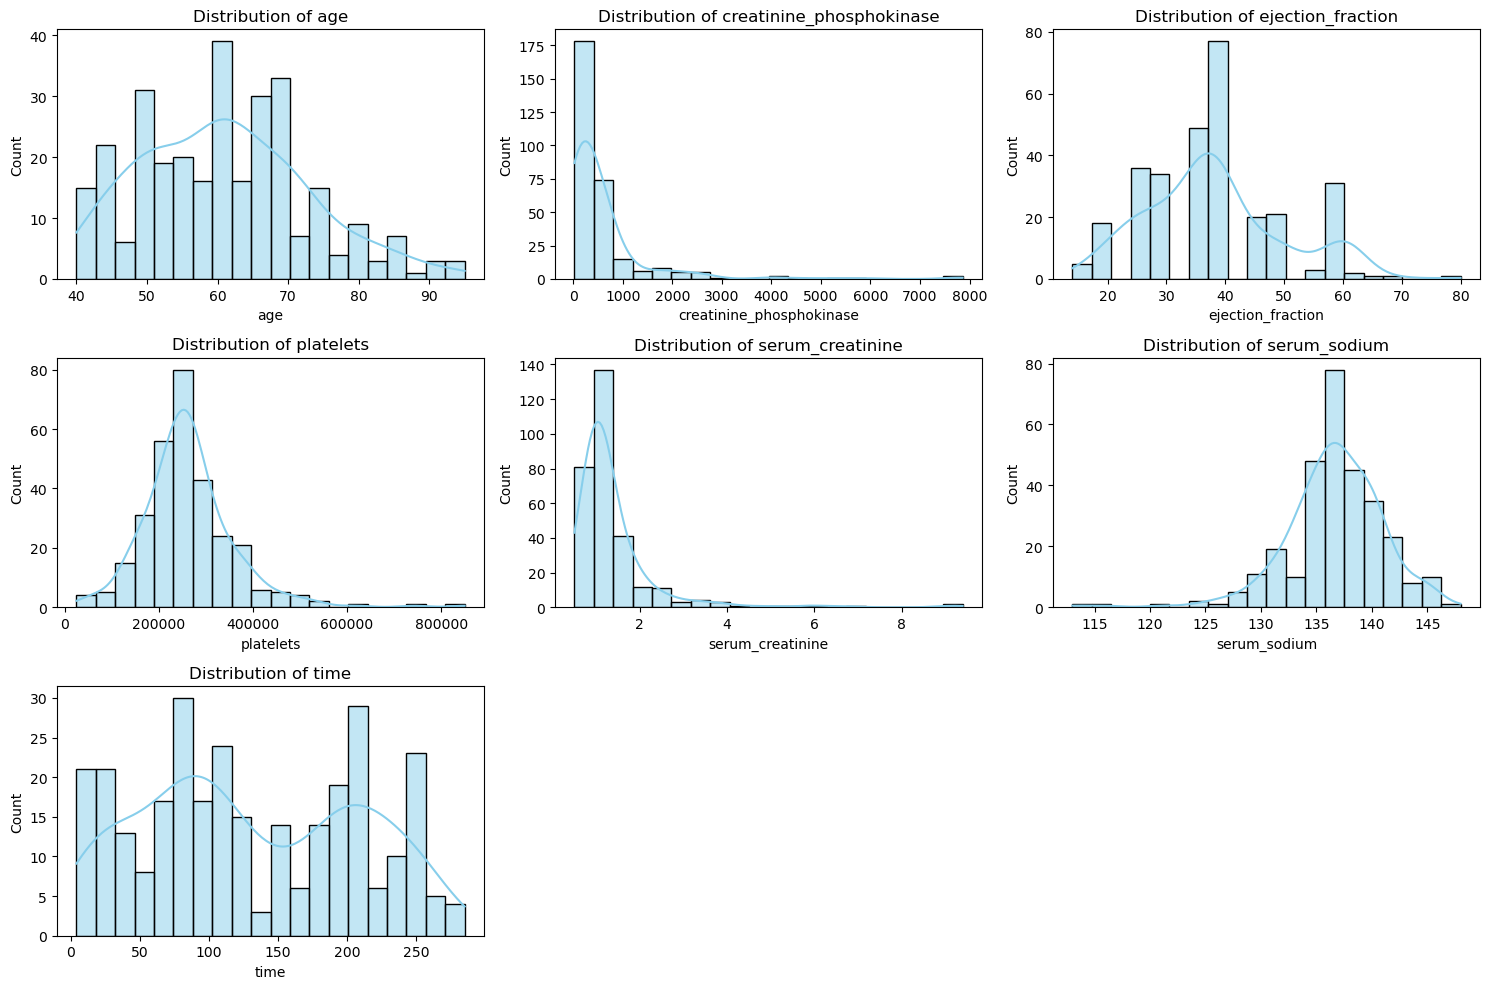

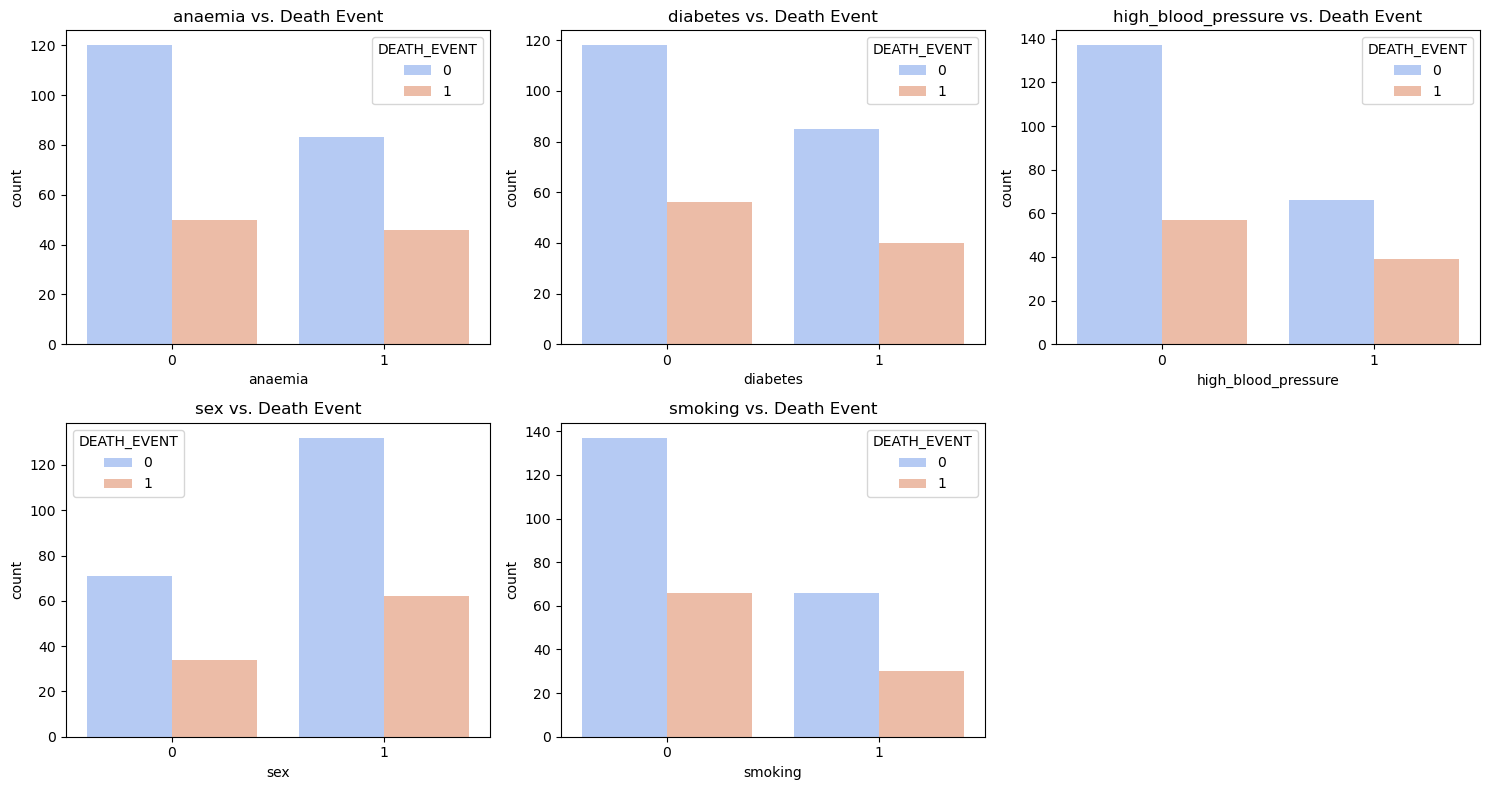

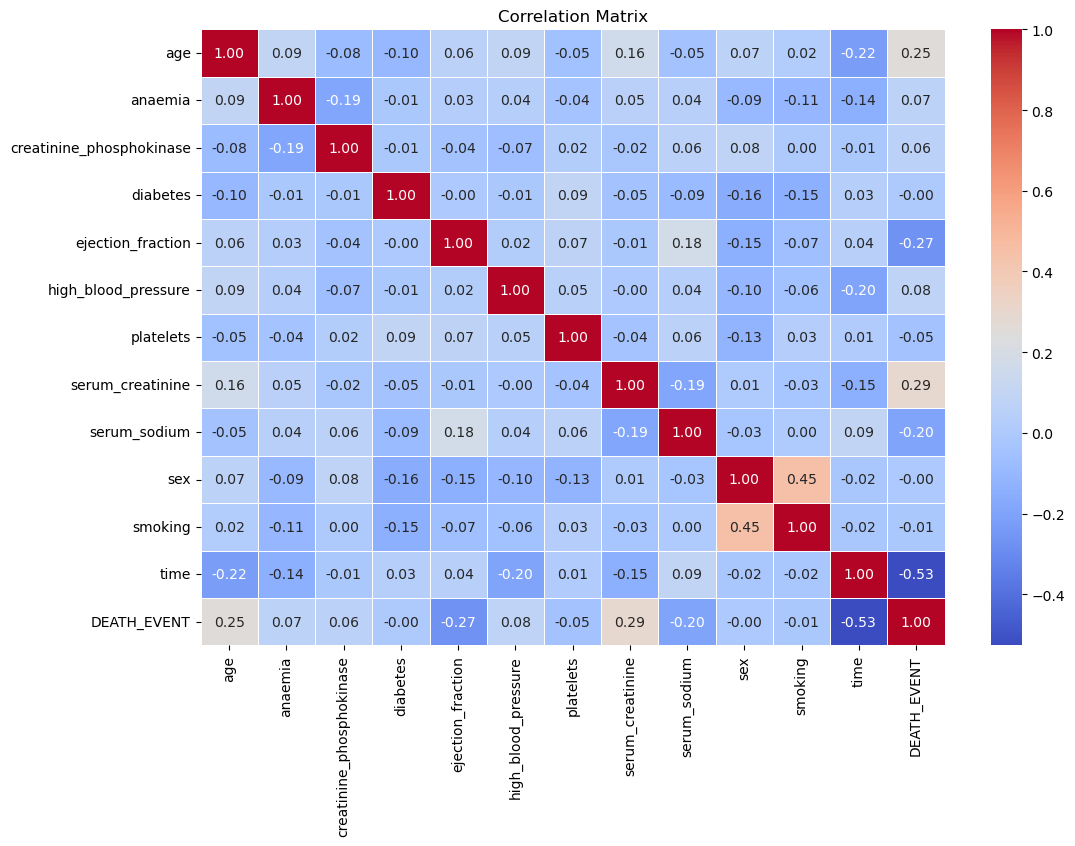


After SMOTE Application:
DEATH_EVENT
1    203
0    203
Name: count, dtype: int64

Logistic Regression Results:
Accuracy: 0.8659
Precision: 0.8947
Recall: 0.8293
F1-Score: 0.8608
ROC-AUC: 0.9179


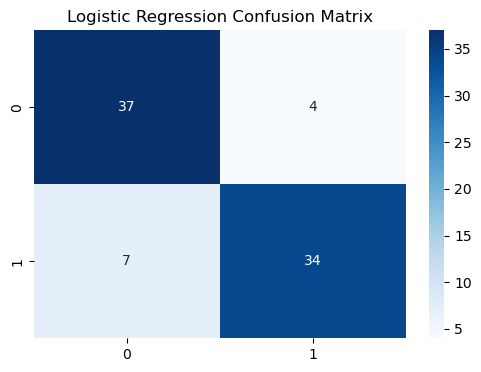

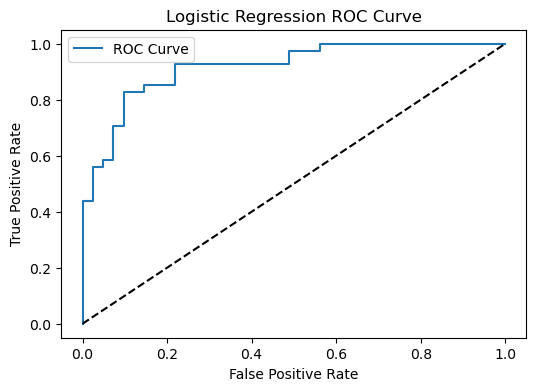


Decision Tree Results:
Accuracy: 0.7805
Precision: 0.7674
Recall: 0.8049
F1-Score: 0.7857
ROC-AUC: 0.7805


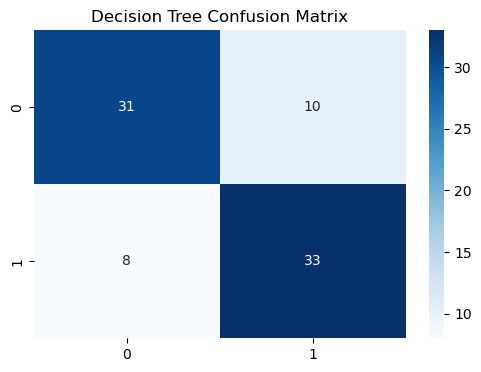

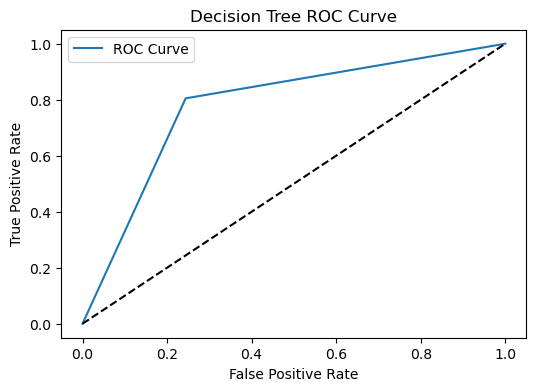


Random Forest Results:
Accuracy: 0.9024
Precision: 0.8667
Recall: 0.9512
F1-Score: 0.9070
ROC-AUC: 0.9515


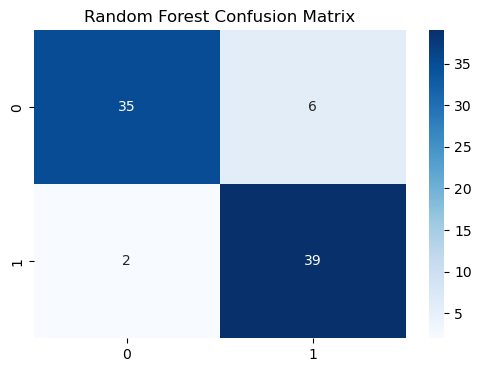

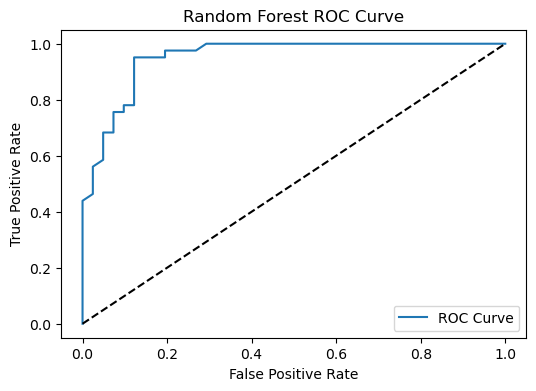


Random Forest Feature Importance Scores:
                     Feature  Importance
11                      time    0.357187
7           serum_creatinine    0.163460
4          ejection_fraction    0.131828
0                        age    0.079086
2   creatinine_phosphokinase    0.076054
6                  platelets    0.064912
8               serum_sodium    0.058407
9                        sex    0.020129
10                   smoking    0.016069
1                    anaemia    0.012479
5        high_blood_pressure    0.010583
3                   diabetes    0.009805


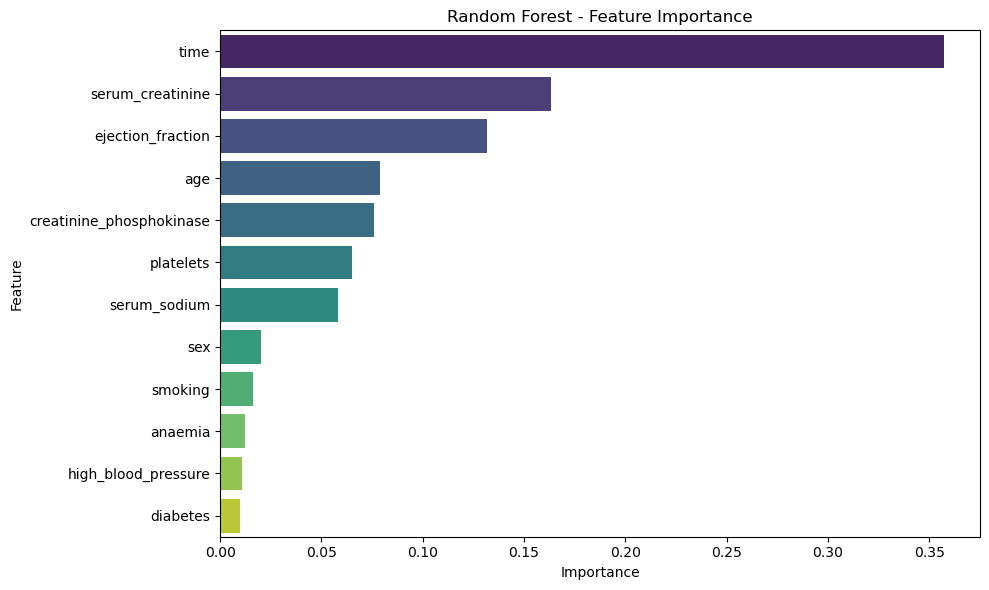


K-Nearest Neighbors Results:
Accuracy: 0.8902
Precision: 0.8810
Recall: 0.9024
F1-Score: 0.8916
ROC-AUC: 0.9298


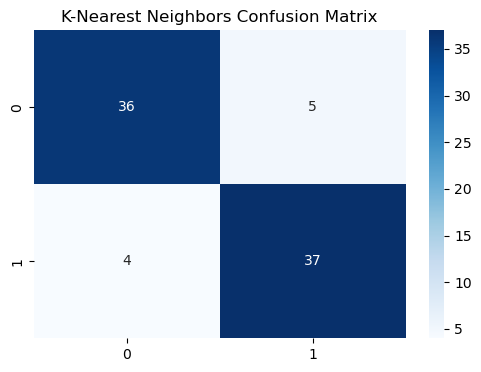

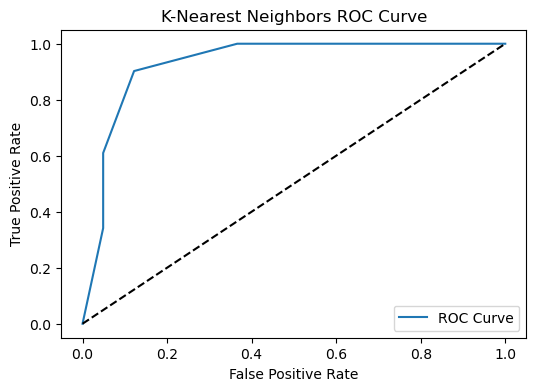


Support Vector Machine Results:
Accuracy: 0.8659
Precision: 0.8409
Recall: 0.9024
F1-Score: 0.8706
ROC-AUC: 0.9304


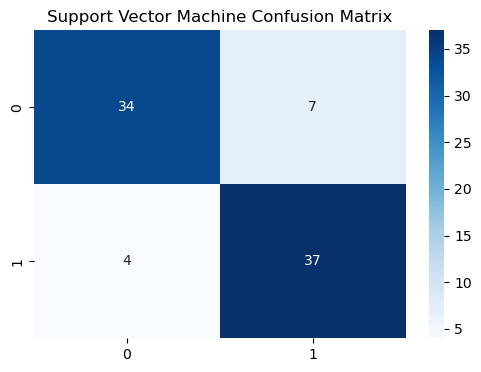

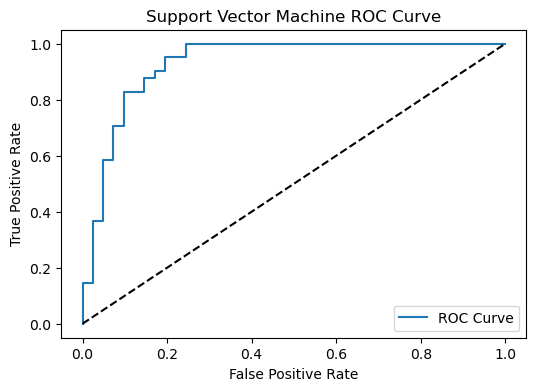


Cross-Validation Results (Random Forest):
Cross-Validation Accuracy Scores: [0.53658537 0.81481481 0.88888889 0.88888889 0.97530864]
Mean CV Accuracy: 0.8209 ± 0.1510


['best_model.pkl']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

# Load the dataset
df = pd.read_csv("heart.csv")

# =============================================
# Exploratory Data Analysis (EDA)
# =============================================

print("\n" + "="*50)
print("Exploratory Data Analysis (EDA)")
print("="*50 + "\n")

# 1. Basic Dataset Info
print("1. Dataset Overview:")
print(f"- Number of Rows: {df.shape[0]}")
print(f"- Number of Columns: {df.shape[1]}")
print("\nFirst 5 Rows:")
print(df.head())

# 2. Data Types and Missing Values
print("\n2. Data Types and Missing Values:")
print(df.info())

# 3. Descriptive Statistics
print("\n3. Descriptive Statistics:")
print(df.describe().transpose())

# 4. Target Variable Distribution
print("\n4. Target Variable Distribution (DEATH_EVENT):")
print(df['DEATH_EVENT'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DEATH_EVENT', palette='viridis', hue='DEATH_EVENT', legend=False)
plt.title('Distribution of Death Events (0 = Survived, 1 = Deceased)')
plt.show()

# 5. Numerical Features Distribution
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                 'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 6. Categorical Features Analysis
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='DEATH_EVENT', palette='coolwarm')
    plt.title(f'{col} vs. Death Event')
plt.tight_layout()
plt.show()

# 7. Correlation Analysis
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# =============================================
# Data Preprocessing
# =============================================

# Handle Imbalanced Data using SMOTE
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of the target variable
print("\nAfter SMOTE Application:")
print(pd.Series(y_resampled).value_counts())

# Handle Outliers using Robust Scaling
scaler = RobustScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, 
                                                  test_size=0.2, random_state=42)

# =============================================
# Model Training and Evaluation
# =============================================

def evaluate_model(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # For models that support probability estimates
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # ROC Curve if available
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label='ROC Curve')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend()
        plt.show()

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print("\n" + "="*50)
    print(f"{name} Results:")
    print("="*50)
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test, name)
    
    # Add feature importance analysis 
    if name == "Random Forest":
        # Get feature importance scores
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nRandom Forest Feature Importance Scores:")
        print(feature_importance)
        
        # Visualize top features
        plt.figure(figsize=(10,6))
        sns.barplot(
            x='Importance', 
            y='Feature', 
            data=feature_importance, 
            hue='Feature',
            palette='viridis',
            legend=False
        )
        plt.title('Random Forest - Feature Importance')
        plt.tight_layout()
        plt.show()
        
# Cross-validation for Random Forest
print("\n" + "="*50)
print("Cross-Validation Results (Random Forest):")
print("="*50)
cv_scores = cross_val_score(models["Random Forest"], X_resampled_scaled, y_resampled, 
                          cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Save the best model
joblib.dump(models["Random Forest"], 'best_model.pkl')